<center>
<h1> SOLUCIÓN TAREA 4</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>


In [1]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance,standard_deviation,mean
from scipy.stats import variation

In [2]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

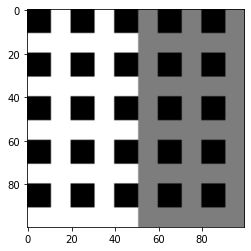

In [63]:
img = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        if i%20>10 or j%20>10:
            img[i, j] = 255
            if j>50:
                img[i, j] = 125

plt.imshow(img,cmap='gray')

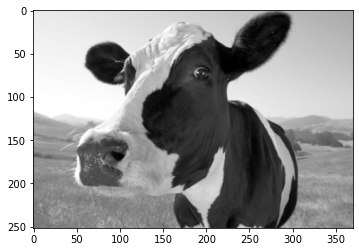

In [111]:
img = cv2.imread('fig/img.jpg',0)
#HACEMOS EL CAMBIO DE BGR A RGB
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')

In [110]:
#np.random.seed(seed=42)
#gauss = np.random.normal(0.1,0.01,img.size,)
#gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
#noise_img = img + img * gauss
#
#plt.imshow(noise_img,cmap='gray')

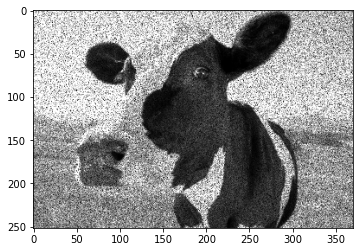

In [114]:
from skimage.util import random_noise


noise_img = random_noise(img, mode='speckle',mean=0,var=0.1)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.imshow(noise_img,cmap='gray')

<h1>PRIMER PUNTO</h1> Implementar, en OpenCV, tres de los filtros para reducción de ruido Speckle vistos en clase.

In [10]:
def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2
    overall_variance = variance(img)
    img_weights = img_variance**2 / (img_variance**2 + overall_variance**2)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

In [121]:
lee_img =lee_filter(noise_img,4)

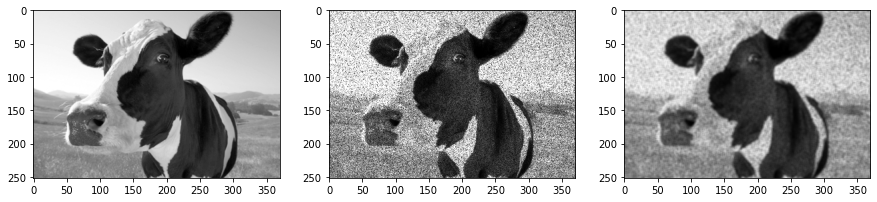

In [122]:
plt.figure(1,figsize=[15,15])
plt.subplot(131).imshow(img,cmap='gray')
plt.subplot(132).imshow(noise_img,cmap='gray')
plt.subplot(133).imshow(lee_img,cmap='gray')

In [59]:
lee_img =lee_filter(noise_img,7)

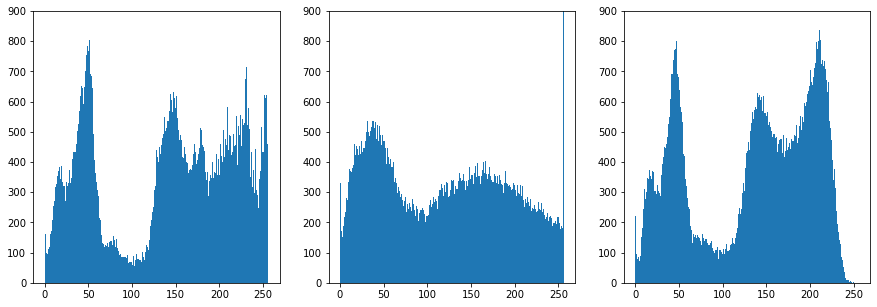

In [120]:
plt.figure(1,figsize=[15,5])
plt.subplot(131).hist(img.ravel(),256,[0,256])
plt.ylim(0, 900)
plt.subplot(132).hist(noise_img.ravel(),256,[0,256])
plt.ylim(0, 900)
plt.subplot(133).hist(lee_img.ravel(),256,[0,256])
plt.ylim(0, 900)
plt.show()

In [123]:
def kuan_filter(img, size):
    img_mean = uniform_filter(img, (size, size))  #VALOR MEDIO CORRESPONDIENTE A LA VENTANA
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2     #ESTIMACION DE LA VARIANZA DE LA IMAGEN ORIGINAL EN LA VENTANA
    L = (np.std(img)/np.mean(img))**2
    img_variance_denoise = (L*img_variance-img_mean**2)/(L+1)
    img_output = img_mean + (img_variance_denoise*(img-img_mean))/(img_variance_denoise+(img_mean+img_variance_denoise)/L)
    return img_output

<ipython-input-123-ad263ed3d607>:7: RuntimeWarning: invalid value encountered in true_divide
  img_output = img_mean + (img_variance_denoise*(img-img_mean))/(img_variance_denoise+(img_mean+img_variance_denoise)/L)


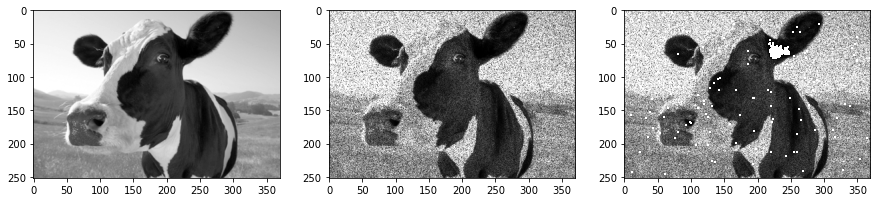

In [124]:
plt.figure(1,figsize=[15,15])
plt.subplot(131).imshow(img,cmap='gray')
plt.subplot(132).imshow(noise_img,cmap='gray')
plt.subplot(133).imshow(kuan_filter(noise_img,1),cmap='gray')

<h1>SEGUNDO PUNTO</h1>Implementar, en OpenCV, cinco de las técnicas de estimación del nivel de ruido vistas en clase.

In [16]:
from skimage.metrics import peak_signal_noise_ratio
#SNR
SNR_1=np.mean(noise_img)/np.std(noise_img)
SNR_2=mean(noise_img)/standard_deviation(noise_img)
SNR_1,SNR_2,peak_signal_noise_ratio(img,noise_img)

(1.7437040564100927, 1.7437040564100927, 19.826577402103055)

In [138]:
variance(img)

5836.567646576527

<h1>TERCER PUNTO</h1>Evaluar el desempeño de los filtros implementados (estimar el nivel de ruido en las imágenes antes y después de filtradas), al ser aplicados sobre imágenes reales y sobre imágenes sintéticas (creadas artificialmente), con
diferentes niveles de ruido multiplicativo.

In [143]:
from scipy.ndimage.filters import uniform_filter 
def LeeFilter(Array, N = 11, sig = 50000, mode="reflect"):
    """
        N = size of filter box
        Sig = Estimate of Variance
        mode = mode for convolution, defauts to reflect
    """

    #width of the window
    Delta = int((N - 1) / 2)     
    #sz = np.shape(Array)
    n_row = Array.shape[0]    
    n_col = Array.shape[1]

    mean = uniform_filter(Array, (N,N))
    z = np.zeros((n_row, n_col))

    for nc in range(Delta, n_col - Delta):  
        for nr in range(Delta, n_row - Delta):
            
            # METHOD #1
            # creating the temp_arr takes a lot of overhead, ~3 sec 

            #temp_arr = Array[nr - Delta:nr + Delta, nc - Delta:nc + Delta] - mean[nr,nc]
            #ntemp_row = temp_arr.shape[0]
            #ntemp_col = temp_arr.shape[1]
            #total = 0.0
            #for tr in xrange(0, ntemp_row):
            #    for tc in xrange(0, ntemp_col):
            #        total += temp_arr[tr,tc]**2

            #z[nr, nc] = total


            # METHOD #2
            # Without types on indices v and w, this is esesntially a pure python
            # loop, and takes ~20 sec    
            #total = 0.0
            #for v in range(-Delta, Delta+1):
             #   for w in range(-Delta, Delta+1):
              #      #print nc, nr, v, w, total
               #     total += (Array[nr + v, nc +  w ] - mean[nr,nc])**2

            #z[nr, nc] = total

            # METHOD #3
            # ~5 sec using numpy.sum()
            z[nr, nc] = np.sum((Array[nr - Delta:nr + Delta, nc - Delta:nc + Delta] - mean[nr,nc])**2)

    z = z / (N**2 - 1)
    
    #Upon starting the next equation,  Z = Var(Z). Upon exit, Z = Var(X) 
    #of equation 19 of Lee, Optical Engineering 25(5), 636-643 (May 1986)
    #
    #VAR_X = (VAR_Z + Mean^2 )/(Sigma^2 +1) - Mean^2   (19)
    #
    #Here we constrain to >= 0, because Var(x) can't be negative:
    var_x=(z + mean**2) /(sig**2 + 1.0) - mean**2

    #return value from equation 21,22 of Lee, 1986.
    #K = ( VAR_X/(mean^2 * Sigma^2 + VAR_X) )          (22)
    #Filtered_Image = Mean + K * ( Input_Image - Mean) (21)
  
    #cdef np.ndarray[DTYPE_t, ndim=2] out_array = mean + (Array - mean) * ( var_x/(mean_squared*sig**2 + var_x) ) 

    return mean + (Array - mean) * ( var_x/(mean**2 * sig**2 + var_x) ) 

<ipython-input-143-dbd626ce2c72>:66: RuntimeWarning: invalid value encountered in true_divide
  return mean + (Array - mean) * ( var_x/(mean**2 * sig**2 + var_x) )


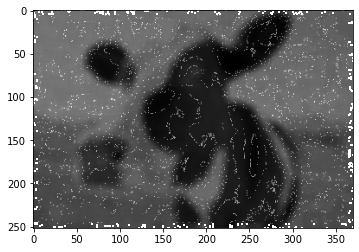

In [144]:
plt.imshow(LeeFilter(noise_img),cmap='gray')

In [185]:
COEF_VAR_DEFAULT = 0.001
CU_DEFAULT = 0.5

def weighting_lee(window, cu=CU_DEFAULT):
    """
    Computes the weighthing function for Lee filter using cu as the noise
    coefficient.
    """
    # cu is the noise variation coefficient
    two_cu = cu * cu

    # ci is the variation coefficient in the window
    window_mean = mean(window)
    window_std = standard_deviation(window)
    ci = window_std / window_mean

    two_ci = ci * ci

    if not two_ci:  # dirty patch to avoid zero division
        two_ci = COEF_VAR_DEFAULT

    if cu > ci:
        w_t = 0.0
    else:
        w_t = 1.0 - (two_cu / two_ci)

    return w_t

def lee_filter(img, win_size=6, cu=CU_DEFAULT):
    """
    Apply lee to a numpy matrix containing the image, with a window of
    win_size x win_size.
    """
    # we process the entire img as float64 to avoid type overflow error
    img = np.float64(img)
    img_filtered = np.zeros_like(img)
    N, M = img.shape
    win_offset = int(win_size / 2)

    for i in range(0, N):
        xleft = i - win_offset
        xright = i + win_offset

        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N

        for j in range(0, M):
            yup = j - win_offset
            ydown = j + win_offset

            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M

            pix_value = img[i, j]
            window = img[xleft:xright, yup:ydown]
            w_t = weighting_lee(window, cu)
            window_mean = mean(window)
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))
            if new_pix_value <= 0:
                img_filtered[i, j] = 255
            else:
                img_filtered[i, j] = new_pix_value
            

    return img_filtered

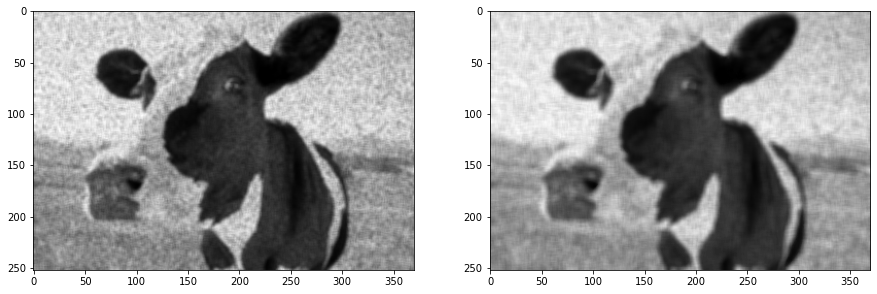

In [180]:
plt.figure(1,figsize=[15,15])
plt.subplot(121).imshow(lee_img,cmap='gray')
plt.subplot(122).imshow(lee_filter(noise_img , cu=1),cmap='gray')

In [192]:
def weighting_kuan(window, cu=CU_DEFAULT):
    """
    Computes the weighthing function for Kuan filter using cu as the noise
    coefficient.
    """
    two_cu = cu * cu

    ci = variation(window, None)
    two_ci = ci * ci

    if not two_ci:  # dirty patch to avoid zero division
        two_ci = COEF_VAR_DEFAULT

    divisor = 1.0 + two_cu

    if not divisor:
        divisor = 0.0001

    if cu > ci:
        w_t = 0.0
    else:
        w_t = (1.0 - (two_cu / two_ci)) / divisor

    return w_t


def kuan_filter(img, win_size=6, cu=CU_DEFAULT):
    """
    Apply kuan to a numpy matrix containing the image, with a window of
    win_size x win_size.
    """

    # we process the entire img as float64 to avoid type overflow error
    img = np.float64(img)
    img_filtered = np.zeros_like(img)

    N, M = img.shape
    win_offset = int(win_size / 2)

    for i in range(0, N):
        xleft = i - win_offset
        xright = i + win_offset

        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N

        for j in range(0, M):
            yup = j - win_offset
            ydown = j + win_offset

            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M

        
            pix_value = img[i, j]
            window = img[xleft:xright, yup:ydown]
            w_t = weighting_kuan(window, cu)
            window_mean = window.mean()
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))
            if new_pix_value <= 0:
                img_filtered[i, j] = 255
            else:
                img_filtered[i, j] = new_pix_value

    return img_filtered

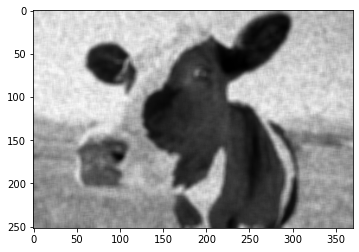

In [193]:
plt.imshow(kuan_filter(noise_img , cu=1),cmap='gray')

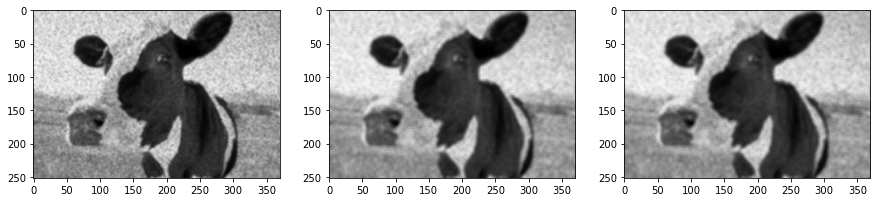

In [194]:
plt.figure(1,figsize=[15,15])
plt.subplot(131).imshow(lee_img,cmap='gray')
plt.subplot(132).imshow(lee_filter(noise_img , cu=1),cmap='gray')
plt.subplot(133).imshow(kuan_filter(noise_img , cu=1),cmap='gray')

In [211]:
def compute_coef_var(image, x_start, x_end, y_start, y_end):
    """
    Compute coefficient of variation in a window of [x_start: x_end] and
    [y_start:y_end] within the image.
    """

    x_size, y_size = image.shape
    x_overflow = x_end > x_size
    y_overflow = y_end > y_size

    window = image[x_start:x_end, y_start:y_end]

    coef_var = variation(window, None)

    if not coef_var:  # dirty patch
        coef_var = COEF_VAR_DEFAULT
#        print "squared_coef was equal zero but replaced by %s" % coef_var
    
    return coef_var


def calculate_all_Mi(window_flat, factor_A, window):
    """
    Compute all the weights of pixels in the window.
    """
    N, M = window.shape
    center_pixel = np.float64(window[N//2, M//2])
    window_flat = np.float64(window_flat)

    distances = np.abs(window_flat - center_pixel)

    weights = np.exp(-factor_A * distances)

    return weights


def calculate_local_weight_matrix(window, factor_A):
    """
    Returns an array with the weights for the pixels in the given window.
    """
    weights_array = np.zeros(window.size)
    window_flat = window.flatten()

    weights_array = calculate_all_Mi(window_flat, factor_A, window)

    return weights_array


def frost_filter(img, damping_factor=2.0, win_size=6):
    """
    Apply frost filter to a numpy matrix containing the image, with a window of
    win_size x win_size.
    By default, the window size is 3x3.
    """


    img_filtered = np.zeros_like(img)
    N, M = img.shape
    win_offset = int(win_size / 2)

    for i in range(0, N):
        xleft = i - win_offset
        xright = i + win_offset
        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N - 1
        for j in range(0, M):
            yup = j - win_offset
            ydown = j + win_offset
            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M - 1

            variation_coef = compute_coef_var(img, xleft, xright, yup, ydown)
            window = img[xleft:xright, yup:ydown]
            window_mean = window.mean()
            sigma_zero = variation_coef / window_mean  # var / u^2
            factor_A = damping_factor * sigma_zero

            weights_array = calculate_local_weight_matrix(window, factor_A)
            pixels_array = window.flatten()

            weighted_values = weights_array * pixels_array
            img_filtered[i, j] = weighted_values.sum() / weights_array.sum()

    return img_filtered

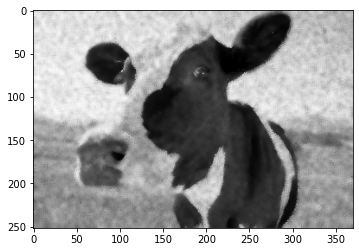

In [212]:
plt.imshow(frost_filter(noise_img),cmap='gray')

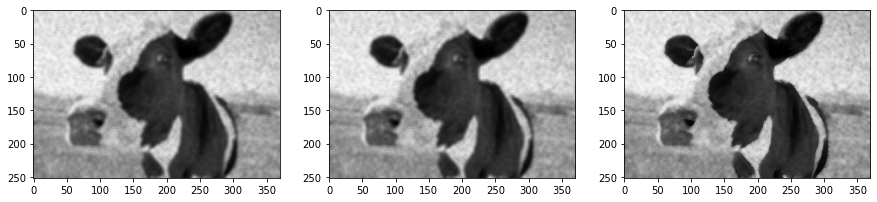

In [213]:
plt.figure(1,figsize=[15,15])
plt.subplot(131).imshow(lee_filter(noise_img , cu=1),cmap='gray')
plt.subplot(132).imshow(kuan_filter(noise_img , cu=1),cmap='gray')
plt.subplot(133).imshow(frost_filter(noise_img),cmap='gray')